In [3]:
import zipfile
with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [4]:
import os
import zipfile

path = 'c:\\Users\\yjkim\\pytorch_study\\sesac'

data = os.path.join(path, 'data')
train_data = os.path.join(data, 'train')
test_data = os.path.join(data, 'test1')

zip_file = zipfile.ZipFile(os.path.join(data,'train.zip'))
zip_file.extractall(path=data)
zip_file.close()

zip_file = zipfile.ZipFile(os.path.join(data,'test1.zip'))
zip_file.extractall(path=data)
zip_file.close()

In [5]:
train_files = os.listdir(train_data)
test_files = os.listdir(test_data)

print(len(train_files))
print(len(test_files))

25000
12500


In [6]:
train_files[0]

'cat.0.jpg'

In [7]:
test_files[0]

'1.jpg'

In [8]:
number_of_dogs = 0
number_of_cats = 0

for i in range(len(train_files)):
    if train_files[i].split('.')[0] == 'dog':
        number_of_dogs += 1
    else:
        number_of_cats += 1

print(number_of_dogs)
print(number_of_cats)

12500
12500


In [9]:
#이미지 분류 레이블을 만드는 방법
#방법 1은 폴더로 클래스를 나누는 방법: 폴더명을 레이블로 사용하는 방법
#방법 2는 csv 파일을 만든다. csv 파일의 컬럼 2개 (column 1: 파일명, column 2: 레이블)

#방법 1 사용
#연습시에는 데이터 4000장만 사용(고양이 2000장, 강아지 2000장)
#train: 1000장, 1000장, valid: 500장, 500장, test: 500장, 500장

In [10]:
sdata = 'sdata'
train_sdata = os.path.join(sdata, 'train')
valid_sdata = os.path.join(sdata, 'valid')
test_sdata = os.path.join(sdata, 'test')

os.makedirs(train_sdata, exist_ok=True)
os.makedirs(valid_sdata, exist_ok=True)
os.makedirs(test_sdata, exist_ok=True)

train_sdata_dog = os.path.join(train_sdata, 'dog')
train_sdata_cat = os.path.join(train_sdata, 'cat')
os.makedirs(train_sdata_dog, exist_ok=True)
os.makedirs(train_sdata_cat, exist_ok=True)

valid_sdata_dog = os.path.join(valid_sdata, 'dog')
valid_sdata_cat = os.path.join(valid_sdata, 'cat')
os.makedirs(valid_sdata_dog, exist_ok=True)
os.makedirs(valid_sdata_cat, exist_ok=True)

In [11]:
train_len_check = os.listdir(os.path.join(os.getcwd(), 'data\\train'))
test_len_check = os.listdir(os.path.join(os.getcwd(), 'data\\test1'))
print(len(train_len_check), len(test_len_check))

25000 12500


In [12]:
train_num = 10000
valid_num = 2500

train_range = [0, train_num-1]
valid_range = [train_num, train_num + valid_num -1]

print(train_range)
print(valid_range)

[0, 9999]
[10000, 12499]


In [13]:
import os
import shutil

# 데이터셋 디렉토리 경로 설정
dataset_dir = 'data/train'

# 새로운 train, valid, test 디렉토리 생성 경로
base_dir = 'sdata'

# 클래스 목록
classes = ['dog', 'cat']

# 폴더 경로 생성
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')

# 폴더 생성 함수
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# train, valid, test 폴더 및 각각의 클래스 폴더 생성
for cls in classes:
    create_dir(os.path.join(train_dir, cls))
    create_dir(os.path.join(valid_dir, cls))

# 이미지 복사 함수
def copy_images(start_idx, end_idx, src_dir, dst_dir, label):
    for i in range(start_idx, end_idx + 1):
        file_name = f'{label}.{i}.jpg'
        src_path = os.path.join(src_dir, file_name)
        dst_path = os.path.join(dst_dir, file_name)
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)

# 클래스별로 train, valid, test 데이터셋 구성
for cls in classes:
    # train dataset 구성 (0~9999)
    copy_images(train_range[0], train_range[1], dataset_dir, os.path.join(train_dir, cls), cls)

    # valid dataset 구성 (10000~12499)
    copy_images(valid_range[0], valid_range[1], dataset_dir, os.path.join(valid_dir, cls), cls)

print("데이터셋 분할 및 복사가 완료되었습니다.")

데이터셋 분할 및 복사가 완료되었습니다.


In [14]:
dataset_dir = 'data/test1'
test_dir = os.path.join(base_dir, 'test')

# 이미지 복사 함수
def copy_images(start_idx, end_idx, src_dir, dst_dir):
    for i in range(start_idx, end_idx + 1):
        file_name = f'{i}.jpg'
        src_path = os.path.join(src_dir, file_name)
        dst_path = os.path.join(dst_dir, file_name)
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)

# 클래스별로 train, valid, test 데이터셋 구성
copy_images(1, 12500, dataset_dir, test_dir)

print("데이터셋 분할 및 복사가 완료되었습니다.")

데이터셋 분할 및 복사가 완료되었습니다.


In [15]:
train_sdata_dog = os.listdir(os.path.join(train_sdata, 'dog'))
train_sdata_cat = os.listdir(os.path.join(train_sdata, 'cat'))

valid_sdata_dog = os.listdir(os.path.join(valid_sdata, 'dog'))
valid_sdata_cat = os.listdir(os.path.join(valid_sdata, 'cat'))

test_sdata = os.listdir(os.path.join(sdata, 'test'))

print(len(train_sdata_dog))
print(len(train_sdata_cat))
print(len(valid_sdata_dog))
print(len(valid_sdata_cat))
print(len(test_sdata))

10000
10000
2500
2500
12500


In [16]:
from torch.utils.data import Dataset
from PIL import Image
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, files, root_dir, mode, transform=None):
        self.files = files
        self.root_dir = root_dir
        self.mode = mode
        self.transform = transform

        # 레이블 생성 cat=0, dog=1
        if 'dog' in files[0]:
            self.label = 1
        else:
            self.label = 0

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.files[idx])
        img = Image.open(img_path)

        if self.transform:
            img = self.transform(img)

        if self.mode == 'train':
            return img, np.array(self.label)

        else:
            return img, self.files[idx]

In [17]:
from torchvision import transforms

org_size = (256,256)
img_size = 224

train_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(img_size),
    transforms.ToTensor(),
    #평균이 0.5, 표준편차 0.5 (0~1 사이의 실수)
    transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
])

test_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
])

In [18]:
#파일 목록, 파일 디렉터리, 모드, transform
train_dog_dataset = CustomDataset(train_sdata_dog, os.path.join(train_dir, 'dog'), 'train', transform=train_transform)
train_cat_dataset = CustomDataset(train_sdata_cat, os.path.join(train_dir, 'cat'), 'train', transform=train_transform)

valid_dog_dataset = CustomDataset(valid_sdata_dog, os.path.join(valid_dir, 'dog'), 'train', transform=test_transform)
valid_cat_dataset = CustomDataset(valid_sdata_cat, os.path.join(valid_dir, 'cat'), 'train', transform=test_transform)

# 아래 test_sdata 변수로 바꿨음
test_dog_dataset = CustomDataset(test_sdata, os.path.join(test_dir), 'test', transform=test_transform)
test_cat_dataset = CustomDataset(test_sdata, os.path.join(test_dir), 'test', transform=test_transform)

In [19]:
from torch.utils.data import ConcatDataset

train_dataset = ConcatDataset([train_dog_dataset, train_cat_dataset])
valid_dataset = ConcatDataset([valid_dog_dataset, valid_cat_dataset])
test_dataset = ConcatDataset([test_dog_dataset, test_cat_dataset])

In [20]:
from torch.utils.data import DataLoader

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9843137..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7647059..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.45098037..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9137255..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7254902..0.94509804].
Clipping input data to the vali

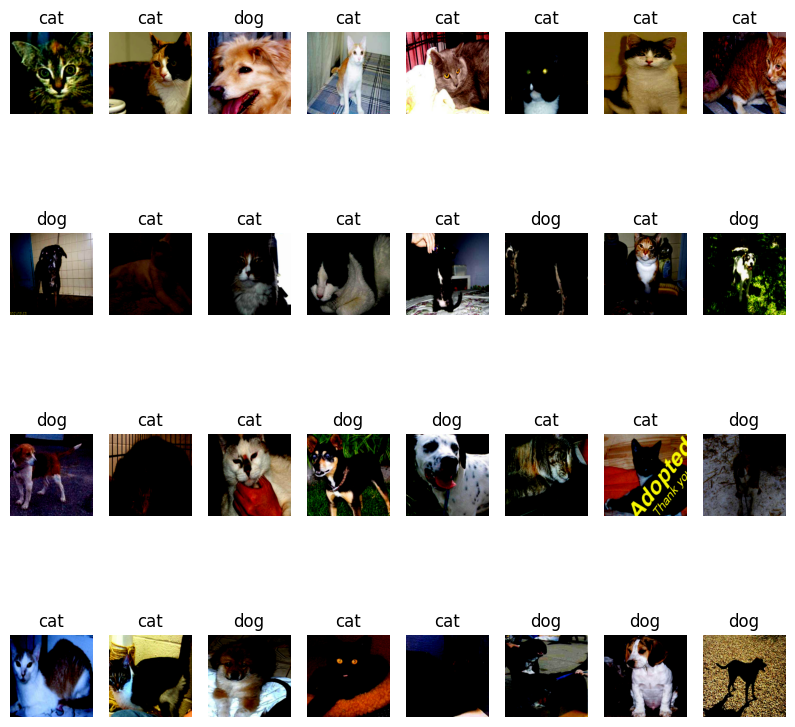

In [21]:
import matplotlib.pyplot as plt

img, label = next(iter(train_loader))
img.shape, label.shape

fig = plt.figure(figsize=(10,10))

classes = {0:'cat', 1:'dog'}

for i in range(32):
    #4행 8열
    ax = fig.add_subplot(4, 8, i+1)
    ax.set_title(classes[label[i].item()])
    ax.axis('off')
    #permute는 color 채널 순서를 재정렬
    ax.imshow(img[i].permute(1,2,0))

plt.show()

In [22]:
import torch
from torchvision.models import resnet50

#imageNet에 사전학습된 모델을 가져와서 학습(train)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = resnet50(pretrained=True).to(device)

c:\Users\yjkim\anaconda3\envs\pt\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\yjkim\anaconda3\envs\pt\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [23]:
%pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [24]:
from torchsummary import summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [25]:
#특징 추출기는 그대로 사용하고, 분류기만 2개짜리로 변경
#fc -> 분류기, in_features -> 분류기의 입력
model = resnet50(pretrained=True).to(device)
num_features = model.fc.in_features

#이진 분류(binary classifier)
#최종 출력 노드의 개수: 1개(0.2, 0의 클래스일 확률이 더 높은 것)(0.5 기준)
#sigmoid()

#다중 분류(multi-label classifier)
#최종 출력 노드의 개수: 2개([0.8,0.2], [0.3,0.7])
#sofrmax()

#분류기는 2개로 변경
model.fc = torch.nn.Sequential(
    torch.nn.Linear(num_features, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(256, 1),
    torch.nn.Sigmoid()
).to(device)

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [26]:
import time
from tqdm import tqdm

def fit(model, criterion, optimizer, epochs, train_loader, valid_loader):
    #훈련 모드
    # model.train()

    train_loss = 0
    train_acc = 0
    train_correct = 0

    #그래프로 출력하기 위한 리스트
    train_losses = []
    train_accuracies = []
    valid_losses = []
    valid_accuracies = []

    for epoch in range(epochs):
        start = time.time()
        train_pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]')
        #1 epoch 중에 train에 해당하는 for문
        for train_x, train_y in train_pbar:
            model.train()
            train_x, train_y = train_x.to(device), train_y.to(device).float()
            optimizer.zero_grad()
            pred = model(train_x)
            loss = criterion(pred, train_y)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            #활성화 함수 sigmoid를 쓰면
            y_pred = pred.cpu()
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
            #train_y와 y_pred이 같으면 correct 개수 추가
            train_correct += y_pred.eq(train_y.cpu()).int().sum()

            train_pbar.set_postfix({'loss': f'{loss.item():.4f}'})

        # validation data check
        valid_loss = 0
        valid_acc = 0
        valid_correct = 0

        #1 epoch 중에 valid에 해당하는 for문
        valid_pbar = tqdm(valid_loader, desc=f'Epoch {epoch+1}/{epochs} [Valid]')
        for valid_x, valid_y in valid_pbar:
            with torch.no_grad():
                model.eval()
                valid_x, valid_y = valid_x.to(device), valid_y.to(device).float()
                pred = model(valid_x)
                loss = criterion(pred, valid_y)
            valid_loss += loss.item()

            y_pred = pred.cpu()
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
            valid_correct += y_pred.eq(valid_y.cpu()).int().sum()

        train_acc = train_correct/len(train_loader.dataset)
        valid_acc = valid_correct/len(valid_loader.dataset)

        print(f'{time.time() - start:.3f}sec : [Epoch {epoch+1}/{epochs}] -> train loss: {train_loss/len(train_loader):.4f}, train acc: {train_acc*100:.3f}% / valid loss: {valid_loss/len(valid_loader):.4f}, valid acc: {valid_acc*100:.3f}%')

        train_losses.append(train_loss/len(train_loader))
        train_accuracies.append(train_acc)
        valid_losses.append(valid_loss/len(valid_loader))
        valid_accuracies.append(valid_acc)

        train_loss = 0
        train_acc = 0
        train_correct = 0

    plt.plot(train_losses, label='loss')
    plt.plot(train_accuracies, label='accuracy')
    plt.legend()
    plt.title('train loss and accuracy')
    plt.show()

    plt.plot(valid_losses, label='loss')
    plt.plot(valid_accuracies, label='accuracy')
    plt.legend()
    plt.title('valid loss and accuracy')
    plt.show()

In [27]:
learning_rate = 0.00001
epochs = 10
#손실 함수 정의
#신경망에 sigmoid를 썼으므로 BCELoss() 사용
#만약 신경망에 softmax를 썼다면 CELoss() 사용
criterion = torch.nn.BCELoss().to(device)
#optimizer 정의
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#학습
fit(model, criterion, optimizer, epochs, train_loader, valid_loader)

Epoch 1/10 [Valid]: 100%|██████████| 157/157 [00:22<00:00,  6.85it/s]


181.939sec : [Epoch 1/10] -> train loss: 0.1181, train acc: 97.165% / valid loss: 0.0307, valid acc: 99.360%


Epoch 2/10 [Train]:   4%|▎         | 23/625 [00:05<02:32,  3.94it/s, loss=0.0125]


KeyboardInterrupt: 

In [ ]:
# 테스트 함수 정의
def test(model, test_loader, device):
    model.eval()
    incorrect_predictions = []
    with torch.no_grad():
        for data, filenames in test_loader:
            data = data.to(device)
            outputs = model(data)
            predicted = (outputs >= 0.5).float()  # sigmoid 결과를 0.5 기준으로 변환

            # 잘못 예측된 이미지 정보 저장
            for i, (filename, pred, true_label) in enumerate(zip(filenames, predicted, outputs)):
                if pred != true_label:
                    class_name = 'dog' if pred.item() == 1 else 'cat'
                    true_class = 'dog' if true_label.item() == 1 else 'cat'
                    incorrect_predictions.append((filename, true_class, class_name))

    return incorrect_predictions

# 테스트 실행
incorrect_predictions = test(model, test_loader, device)

# 잘못 분류된 이미지 정보 출력
print("잘못 분류된 이미지:")
for filename, true_class, predicted_class in incorrect_predictions:
    print(f"파일명: {filename}, 실제 클래스: {true_class}, 예측 클래스: {predicted_class}")